This notebook was copied from `2016-08-25_magnet_array_field_vs_distance.ipynb`

In [23]:
%matplotlib inline
save_directory = '../../../thesis/loss/'
save = True

In [2]:
# Raw data: jack height [mm], B_relative [uT].

# From 2016-07-27
down_near = [
    (59.5, -40.5),
    (70.5, -46.7),
    (80.5, -53.0),
    (89.5, -60.1),
    (99.0, -70.1),
    (110.0, -82.4),
    (119.0, -94.7),
    (129.5, -114.7),
    (139.5, -135.4),
    (150.0, -165.3),
    (160.0, -203.4),
    (170.0, -251.9),
    (179.5, -314.0)]
up_near = [
    (60.0, 40.5),
    (70.0, 46.3),
    (80.5, 54.3),
    (90.0, 61.3),
    (100.0, 70.7),
    (109.5, 82.0),
    (119.0, 96.1),
    (130.0, 115.3),
    (139.5, 137.0),
    (149.5, 165.3),
    (160.0, 203.7),
    (170.0, 253.3),
    (180.0, 315.4)]

# From 2016-08-23
down_far = [
    (80.0, -3.8),
    (100.0, -4.2),
    (120.0, -4.8),
    (140.0, -4.6),
    (160.0, -5.9),
    (180.0, -6.2),
    (200.0, -7.2),
    (220.0, -8.9),
    (240.0, -10.0),
    (260.0, -11.5),
    (270.0, -12.3)]
up_far = [
    (80.0, 2.9),
    (100.0, 3.3),
    (119.5, 3.6),
    (140.0, 4.6),
    (160.5, 4.7),
    (180.0, 6.3),
    (200.0, 7.2),
    (220.0, 8.1),
    (240.0, 9.9),
    (260.0, 11.1),
    (270.0, 11.8)]

# From 2016-08-26
down_mid = [
    (80.0, -10.9),
    (100.0, -11.9),
    (120.0, -14.3),
    (130.0, -16.1),
    (140.0, -17.1),
    (150.0, -18.3),
    (160.0, -20.7),
    (170.0, -23.1),
    (180.0, -25.4),
    (190.0, -28.3),
    (200.0, -30.7),
    (210.0, -35.1),
    (220.0, -40.6),
    (230.0, -45.4),
    (240.0, -51.1),
    (250.0, -59.9),
    (260.0, -68.8),
    (270.0, -81.2)]
up_mid = [
    (80.0, 8.9),
    (100.0, 10.6),
    (120.0, 13.1),
    (130.0, 14.4),
    (140.0, 15.4),
    (150.0, 17.6),
    (160.0, 19.2),
    (170.0, 21.4),
    (180.0, 24.0),
    (190.0, 26.6),
    (200.0, 29.9),
    (210.0, 34.5),
    (220.0, 38.8),
    (230.0, 44.1),
    (240.0, 49.0),
    (250.0, 57.4),
    (260.0, 66.9),
    (270.0, 79.4)]

probe_tip_to_hall_sensor = 0.38
block_thickness_mm = 25.5  # both blocks are the same thickness
magnet_half_thickness_mm = 1.5  # the magnets are about 3 mm thick

near_probe_height_mm = 319.5 + probe_tip_to_hall_sensor
down_near_jack_height_mm = np.array([p[0] for p in down_near])
down_near_B_relative_uT = np.array([p[1] for p in down_near])
up_near_jack_height_mm = np.array([p[0] for p in up_near])
up_near_B_relative_uT = np.array([p[1] for p in up_near])

far_probe_height_mm = 647.0 + probe_tip_to_hall_sensor
down_far_jack_height_mm = np.array([p[0] for p in down_far])
down_far_B_relative_uT = np.array([p[1] for p in down_far])
up_far_jack_height_mm = np.array([p[0] for p in up_far])
up_far_B_relative_uT = np.array([p[1] for p in up_far])

mid_probe_height_mm = 483.0 + probe_tip_to_hall_sensor
down_mid_jack_height_mm = np.array([p[0] for p in down_mid])
down_mid_B_relative_uT = np.array([p[1] for p in down_mid])
up_mid_jack_height_mm = np.array([p[0] for p in up_mid])
up_mid_B_relative_uT = np.array([p[1] for p in up_mid])

down_near_d_mm = near_probe_height_mm - (down_near_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
up_near_d_mm = near_probe_height_mm - (up_near_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

down_far_d_mm = far_probe_height_mm - (down_far_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
up_far_d_mm = far_probe_height_mm - (up_far_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

down_mid_d_mm = mid_probe_height_mm - (down_mid_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
up_mid_d_mm = mid_probe_height_mm - (up_mid_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

In [3]:
down_d_mm = np.concatenate((down_far_d_mm, down_mid_d_mm, down_near_d_mm))
down_B_relative_uT = np.concatenate((down_far_B_relative_uT, down_mid_B_relative_uT, down_near_B_relative_uT))
up_d_mm = np.concatenate((up_far_d_mm, up_mid_d_mm, up_near_d_mm))
up_B_relative_uT = np.concatenate((up_far_B_relative_uT, up_mid_B_relative_uT, up_near_B_relative_uT))

In [4]:
up_color = 'blue'
down_color = 'red'

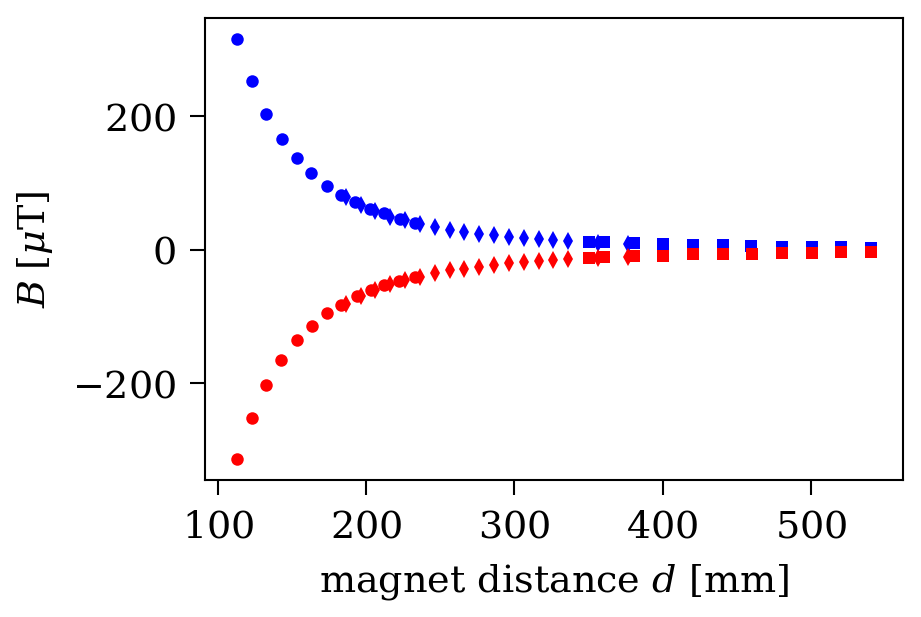

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel('magnet distance $d$ [mm]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_near_d_mm, up_near_B_relative_uT, 'o', color=up_color, label='up')
ax.plot(down_near_d_mm, down_near_B_relative_uT, 'o', color=down_color, label='down')
ax.plot(up_far_d_mm, up_far_B_relative_uT, 's', color=up_color, label='up')
ax.plot(down_far_d_mm, down_far_B_relative_uT, 's', color=down_color, label='down')
ax.plot(up_mid_d_mm, up_mid_B_relative_uT, 'd', color=up_color, label='up')
ax.plot(down_mid_d_mm, down_mid_B_relative_uT, 'd', color=down_color, label='down')


In [6]:
up_slope, up_offset = np.polyfit(up_d_mm**-3, up_B_relative_uT, 1)

In [7]:
up_offset

2.5346229684359303

In [8]:
up_slope

466848717.86876786

In [9]:
down_slope, down_offset = np.polyfit(down_d_mm**-3, down_B_relative_uT, 1)

In [10]:
down_offset

-3.4036232503921622

In [11]:
down_slope

-465226998.86899847

In [27]:
# These are the minimum and maximum distances used in the experiment.
distance_mm_min = 150.82
distance_mm_max = 312.82

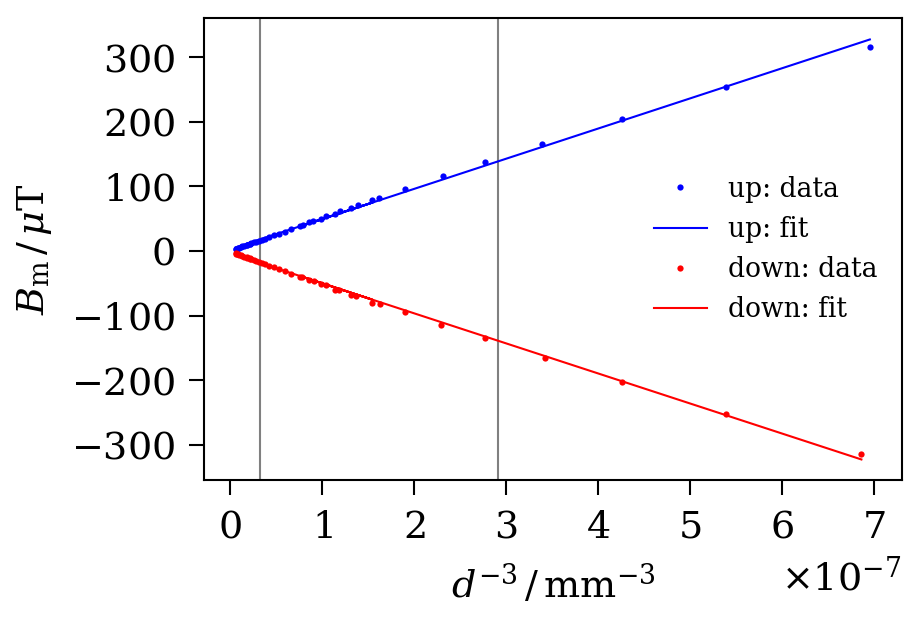

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('$d^{-3} \, / \, \mathrm{mm}^{-3}$')
ax.set_ylabel('$B_\mathrm{m} \, / \, \mu \mathrm{T}$')

ax.axvline(distance_mm_min**-3, color='gray')
ax.axvline(distance_mm_max**-3, color='gray')

ax.plot(up_d_mm**-3, up_B_relative_uT, '.', color=up_color, label='up: data')
ax.plot(up_d_mm**-3, np.polyval((up_slope, up_offset), up_d_mm**-3), '-', color=up_color, label='up: fit')
ax.plot(down_d_mm**-3, down_B_relative_uT, '.', color=down_color, label='down: data')
ax.plot(down_d_mm**-3, np.polyval((down_slope, down_offset), down_d_mm**-3), '-', color=down_color, label='down: fit')

ax.set_xticks(1e-7 * np.arange(8))
ax.set_yticks(100 * np.arange(-3, 4))
ax.legend(loc='center right', fontsize='xx-small')

if save:
    fig.savefig(save_directory + 'magnet_array_field_vs_distance.pdf')